# VIZ for statistical comparison of errors

In [1]:
import os
import warnings

import geopandas as gpd
import matplotlib.pyplot as plt
import momepy as mm
import numpy as np
import pandas as pd
import scipy.stats

from core import stats, utils

In [50]:
methods_to_compare = [
    "original",
    "cityseer",
    "osmnx",
    "parenx-voronoi",
    "parenx-skeletonize",
    "neatnet",
]

cartobold = [
    "#bbbbbb",
    "#11A579",
    "#7F3C8D",
    "#E73F74",
    "#3969AC",
    "#F2B701",
    "#80BA5A",
    "#E68310",
    "#008695",
    "#CF1C90",
    "#f97b72",
    "#4b4b8f",
    "#A5AA99",
]

eval_vars = [
    "avg_degree",
    "coordinate_count",
    "edge_count",
    "edge_length",
    "stroke_count",
    "stroke_length_max",
    "stroke_length_sum",
]

Read in "combined" table from `statistical_comparison.ipynb`

In [58]:
combined = pd.read_csv("combined.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined.head(3)

original  cityseer     osmnx  parenx-voronoi  \
variable   case                                                        
avg_degree Aleppo       0.683894  0.818360  0.732887        0.851845   
           Auckland     0.439375  0.699569  0.498237        0.745444   
           Bucaramanga  0.676782  0.758940  0.697984        0.868573   

                        parenx-skeletonize   neatnet  
variable   case                                       
avg_degree Aleppo                 0.774428  0.912391  
           Auckland               0.709857  0.804845  
           Bucaramanga            0.834364  0.911900

Make dicts for plotting

In [59]:
cities = list(utils.city_fua.keys())
colors = dict(zip(methods_to_compare, cartobold, strict=False))
xpos = dict(zip(cities, range(len(cities)), strict=False))

In [60]:
colors

{'original': '#bbbbbb',
 'cityseer': '#11A579',
 'osmnx': '#7F3C8D',
 'parenx-voronoi': '#E73F74',
 'parenx-skeletonize': '#3969AC',
 'neatnet': '#F2B701'}

***

all in 1:

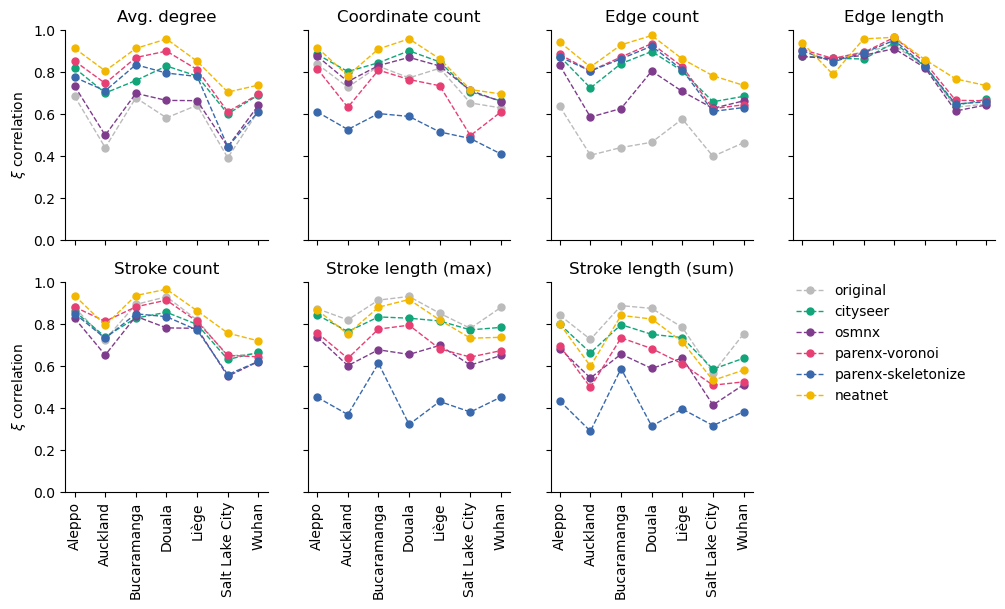

In [63]:
title_mapping = {
    "avg_degree": "Avg. degree",
    "coordinate_count": "Coordinate count",
    "edge_count": "Edge count",
    "edge_length": "Edge length",
    "stroke_count": "Stroke count",
    "stroke_length_max": "Stroke length (max)",
    "stroke_length_sum": "Stroke length (sum)",
}

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12, 6))

for i, metric in enumerate(eval_vars):
    ax = axs.flat[i]

    for method in methods_to_compare:
        ax.plot(
            combined.loc[metric][method],
            color=colors[method],
            linewidth=1,
            linestyle="dashed",
            marker="o",
            markersize=5,
            label=method,
        )
    ax.set_ylim(0, 1)
    if i == 6:
        ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1.05), frameon=False)
    if i in range(4, 7):
        ax.set_xticks(list(xpos.values()))
        ax.set_xticklabels(list(xpos.keys()), rotation=90)
        # ax.set_xlabel("City")
    if i in [0, 4]:
        ax.set_ylabel(r"$\xi$ correlation")
    ax.set_title(title_mapping[metric])
    ax.spines[["right", "top"]].set_visible(False)
axs.flat[-1].remove()
plt.savefig("../../evaluation/chi.png", dpi=300, transparent=True, bbox_inches="tight")

## Deltas

In [64]:
combined = pd.read_csv("combined_deltas.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined.head(3)

original  cityseer  osmnx  parenx-voronoi  \
variable   case                                                     
avg_degree Aleppo          85.59     31.67  58.65           32.94   
           Auckland        33.70     17.34  25.11           19.16   
           Bucaramanga     65.62     27.13  59.54           20.66   

                        parenx-skeletonize  neatnet  
variable   case                                      
avg_degree Aleppo                    35.89    22.85  
           Auckland                  19.29    18.40  
           Bucaramanga               21.91    15.97

Make dicts for plotting

In [65]:
cities = list(utils.city_fua.keys())
colors = dict(zip(methods_to_compare, cartobold, strict=False))
xpos = dict(zip(cities, range(len(cities)), strict=False))

***

all in 1:

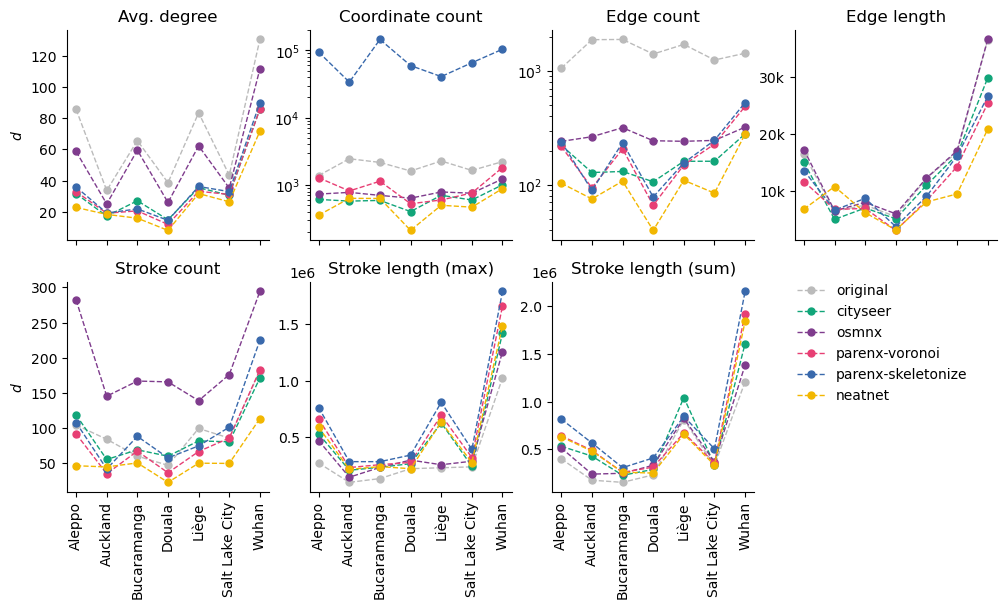

In [66]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=False, figsize=(12, 6))

for i, metric in enumerate(eval_vars):
    ax = axs.flat[i]
    if metric in ["coordinate_count", "edge_count"]:
        ax.set_yscale("log")

    if metric == "edge_length":
        ax.set_yticks([10000, 20000, 30000], labels=["10k", "20k", "30k"])

    if metric in ["stroke_length_max", "stroke_length_sum"]:
        ax.yaxis.offsetText.set_position((-0.1, 0))

    for method in methods_to_compare:
        ax.plot(
            combined.loc[metric][method],
            color=colors[method],
            linewidth=1,
            linestyle="dashed",
            marker="o",
            markersize=5,
            label=method,
        )
    # ax.set_ylim(0, 1)
    if i == 6:
        ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1.05), frameon=False)
    if i in range(4, 7):
        ax.set_xticks(list(xpos.values()))
        ax.set_xticklabels(list(xpos.keys()), rotation=90)
        # ax.set_xlabel("City")
    if i in [0, 4]:
        ax.set_ylabel(r"$d$")
    ax.set_title(title_mapping[metric])
    ax.spines[["right", "top"]].set_visible(False)
axs.flat[-1].remove()
plt.savefig(
    "../../evaluation/delta.png", dpi=300, transparent=True, bbox_inches="tight"
)